In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Collection of Data**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# load the dataset
df = pd.read_csv('/content/drive/MyDrive/archive (6)/Train.csv')

**Preprocessing of data**

In [ ]:
# drop the unnecessary columns
df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

# fill missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna('Unknown', inplace=True)

In [ ]:
# convert categorical variables to numerical variables
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [ ]:
# separate the independent and dependent variables
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# create a random forest regressor model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# make predictions on the testing data and calculate the mean absolute error and root mean squared error

y_pred = rf.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MAE: 832.2061618740713
RMSE: 1172.5605683632914


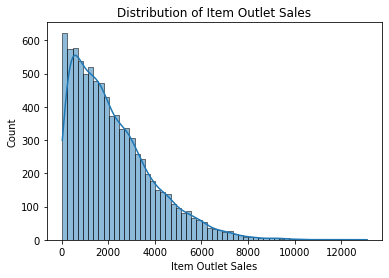

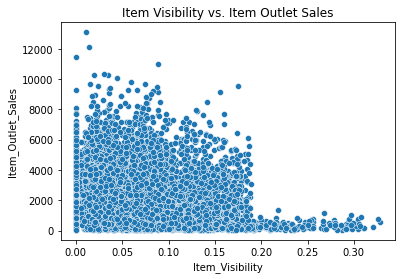

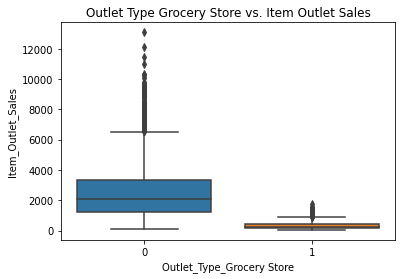

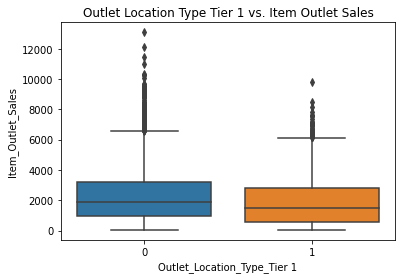

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize the distribution of the target variable
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Count')
plt.show()

# visualize the relationship between the target variable and some of the features
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)
plt.title('Item Visibility vs. Item Outlet Sales')
plt.show()

sns.boxplot(x='Outlet_Type_Grocery Store', y='Item_Outlet_Sales', data=df)
plt.title('Outlet Type Grocery Store vs. Item Outlet Sales')
plt.show()

sns.boxplot(x='Outlet_Location_Type_Tier 1', y='Item_Outlet_Sales', data=df)
plt.title('Outlet Location Type Tier 1 vs. Item Outlet Sales')
plt.show()

In [ ]:
import plotly.express as px

# plot a scatter plot of the relationship between item weight and sales
fig = px.scatter(df, x='Item_Weight', y='Item_Outlet_Sales')
fig.update_layout(title='Item Weight vs. Item Outlet Sales',
                  xaxis_title='Item Weight',
                  yaxis_title='Item Outlet Sales')
fig.show()


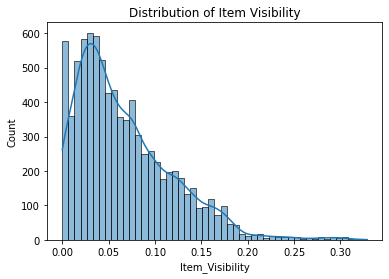

In [ ]:
sns.histplot(df, x='Item_Visibility', kde=True)
plt.title('Distribution of Item Visibility')
plt.show()

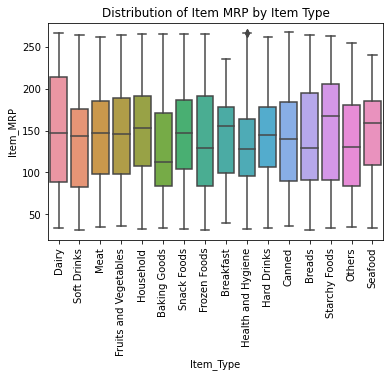

In [ ]:
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Item MRP by Item Type')
plt.show()

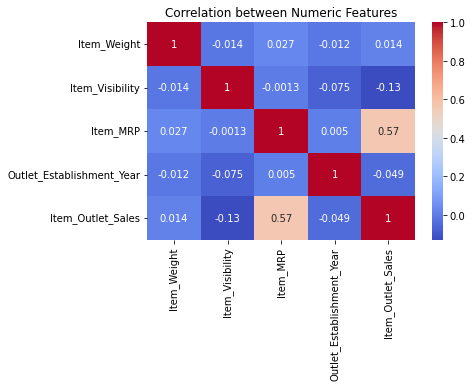

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()

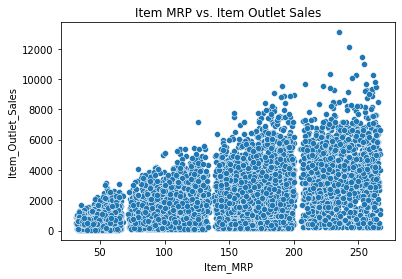

In [ ]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Item MRP vs. Item Outlet Sales')
plt.show()

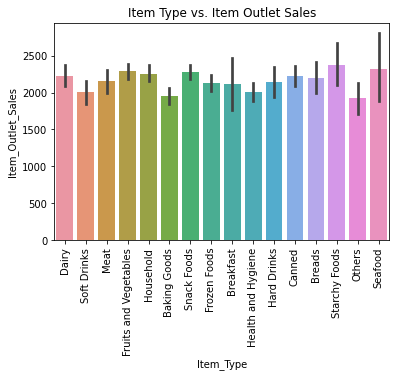

In [ ]:
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Item Type vs. Item Outlet Sales')
plt.show()
